Supervised Learning is a type of ML where the model learns the mapping between inputs and outputs so that it can accurately predict the output for new, unseen data.

**Classification:** to predict the category or class of a given data point based on its features. Unlike regression (predicts a continuous value), classification predicts a discrete label (e.g., "spam" vs. "not spam", "cat" vs "dog", in binary classification or more categories in multiclass classification).
- Binary Classificiation - 2 classes
- Multiclass Classification - more than 2 classes (e.g., classifying handwritten digits)
- Multilabel Classification - multiple labels per instance. An instance can belong to more than one class (e.g., a movie which can be in multiple genres such as comedy, action...)

**Logistic Regression:** actually a calssification algorithm. Predicts the probability that a given unit belongs to a particular class. Used for **binary classification** but, can be extended to multiclass as well.
- The predicted probabilities are obtained by applying the logistic function(sigmoid) to a linear combination of the input features.

**Linear Combination (Logit):** the first step in logistic regression, where we compute a **weighted sum** or **logit** of the input features, plus an intercept(bias term).

$$
z = (\text{slope} \times X) + \text{intercept}
$$

- slope: coefficient(s) learned during training for each feature in $X$
- intercept(bias term): learned during training and shifts the curve
- $z$ = logit

**Sigmoid Function:** applied to the logit z to map predictions to a prbability between 0 and 1.
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

> The output is the probability that a given input belongs to the positive class.

- **Sigmoid Curve:** blue curve that represents the predicted probablity for the positive class(class 1) across the range of $X$. This approaches 1 on one side and 0 on the other side....S curve.

- **Data Points:** black dots that represent the actual data, either class 0 or class 1. Scattered along the X-axis, indicating whether each point belongs to the positive or negative class.

- **Decision Boundary:** red dashed line at $y$ which is the decision threshold. This is where the model switches from predicting class 0 to class 1. Logistic regression outputs a probability (between 0 and 1) for each input, which we can then use to classify it into two classes. A threshold is applied to make the final decision.
    - If $P(y=1 \mid x) \geq 0.5$, classify as the **positive class.**
    - If $P(y=1 \mid x) \leq 0.5$, classify as the **negative class.**

**Log-Loss (Cross-Entropy Loss):** measures the error between the predicted probabilities and the actual class labels. Goal of training is to minimize this error.

---
### Example
Imagine we're training a model to predict whether an email is `spam` (0) or `not spam`(1).

- **Predicted Probabilities:** if the model predicts a probability of 0.9 for `spam`, it's saying it's 90% sure the email is spam.
- **True label:** 1 for `spam`, 0 for `not spam`.

How it's calculated:
- **Probability Calculation:** If the true label is 1, we want the predicted probability to be close to 1. If the true label is 0, we want it close to 0.
- **Compute the Error:** If the true label is 1, the error is calculated as `(-log(predicted probability))`. If the true label is 0, the error is calculated as `(-log(1-predicted probability))`.
- **Compute Log Loss:** individual log errors are averaged across all data points to get the **total Log Loss**. A lower Log Loss indicates the model is predicting well.

Let's say we have three predictions for a binary classification task
- Predicted Probabilities:[0.9, 0.2, 0.8] True labels: [1, 0, 1]
- Data points:
    - First: True label = 1, predicted probability = 0.9, Loss = -log(0.9) $\approx$ 0.10
    - Second: True label = 0, predicted probability = 0.2, Loss = -log(1-0.2) = -log(0.8) $\approx$ 0.22
    - Third: True label = 1, predicted probability = 0.8, Loss = -log(0.8) $\approx$ 0.22
    - Total Log Loss:  
  $$
  \frac{0.10 + 0.22 + 0.22}{3} \approx 0.18
  $$

> An illustration of Binary Cross-Entropy which will show Log Loss ranging from 0.05 to 0.36. A lower log loss value(0.05) indicates a better prediction, while a higher log loss(0.36) indicates a more significant error.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, clear_output

In [2]:
# Generate synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100)

In [3]:
# Create a function for interactive visualization 
def plot_logistic_regression(slope=2.0, intercept=-1.0, threshold=0.5):
    new_linear_combination = slope * X +intercept
    new_probability = 1 / (1 + np.exp(-new_linear_combination))
    predicted_labels = (new_probability > threshold).astype(int)

    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

    # Plot the linear combination
    ax1.plot(X , new_linear_combination, label='Linear Combination')
    ax1.set_xlabel('Feature Value (X)')
    ax1.set_ylabel('Linear Combination (y)')
    ax1.legend()

    # Plot the logistic function output as a subplot
    ax2.plot(X , new_probability, label='Linear Function')
    ax2.set_xlabel('Feature Value (X)')
    ax2.set_ylabel('Probability')
    ax2.legend()

    # Plot the predicted labels
    ax3.scatter(X , predicted_labels, label='Predicted Labels')
    ax3.set_xlabel('Feature Value (X)')
    ax3.set_ylabel('Predicted Label')
    ax3.legend()

    plt.show()

In [4]:
# Create sliders
slope_slider = FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1, description='Slope')
intercept_slider = FloatSlider(value=-1.0, min=-5.0, max=5.0, step=0.1, description='Intercept')
threshold_slider = FloatSlider(value=-0.5, min=-0.0, max=1.0, step=0.01, description='Threshold')

# Create an interactive widget
interact(plot_logistic_regression, slope=slope_slider, intercept=intercept_slider, threshold=threshold_slider)

interactive(children=(FloatSlider(value=2.0, description='Slope', max=5.0, min=-5.0), FloatSlider(value=-1.0, …

<function __main__.plot_logistic_regression(slope=2.0, intercept=-1.0, threshold=0.5)>

**Note:** this was to understand how a given labeled dataset (with datapoints ($X$, $Y$) can use logistic regression to fina a decision boundary that best seperates the classes.

The interactive sliders allow you to:
- Adjust the **slope** and **intercept** values, which change the steepness and position of the logistic curve, helping visualize how different model parameters affect the probability distribution.
- Modify the **threshold** to see how changing the probability cutoff affects the classification, allowing a deeper understanding of how logistic regression classifies data points based on the logistic function's output.

---
### Example
Imagine we're training a model to predict whether an email is `spam` (0) or `not spam`(1).

**Log Loss Function Curve**

This example calculates individual log losses for three predictions and visualizes binary cross-entropy loss against predicted probabilities.


Individual Log Losses: 0.11, 0.22, 0.22
Average Log Loss: 0.18


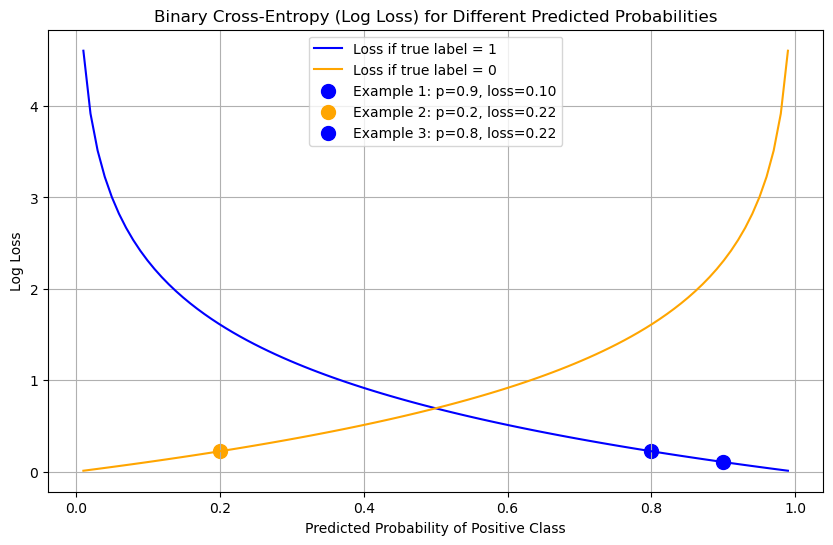

In [21]:
true_labels = np.array([1, 0, 1])
pred_probs = np.array([0.9, 0.2, 0.8])

log_loss_1 = -np.log(pred_probs[0])
log_loss_2 = -np.log(1 - pred_probs[1])
log_loss_3 = -np.log(pred_probs[2])

total_log_loss = (log_loss_1 + log_loss_2 + log_loss_3) / 3

print(f"Individual Log Losses: {log_loss_1:.2f}, {log_loss_2:.2f}, {log_loss_3:.2f}")
print(f"Average Log Loss: {total_log_loss:.2f}")

p = np.linspace(0.01, 0.99, 100)
log_loss_pos = -np.log(p)
log_loss_neg = -np.log(1 - p)

plt.figure(figsize=(10, 6))
plt.plot(p, log_loss_pos, label='Loss if true label = 1', color='blue')
plt.plot(p, log_loss_neg, label='Loss if true label = 0', color='orange')
plt.scatter(pred_probs[0], log_loss_1, color='blue', s=100, label='Example 1: p=0.9, loss=0.10')
plt.scatter(pred_probs[1], log_loss_2, color='orange', s=100, label='Example 2: p=0.2, loss=0.22')
plt.scatter(pred_probs[2], log_loss_3, color='blue', s=100, label='Example 3: p=0.8, loss=0.22')
plt.title('Binary Cross-Entropy (Log Loss) for Different Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


**Logistic Regression Predictions and Errors**

In this example, we visualize predicted probabilities and true labels at specific input feature values. Vertical red dashed lines indicate prediction errors, and log loss values are annotated for each data point.


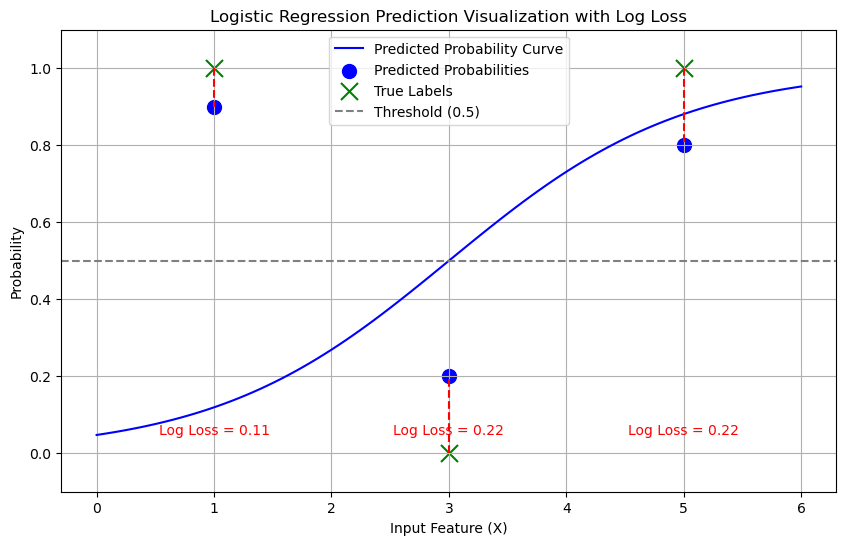

In [22]:
X = np.array([1.0, 3.0, 5.0])
true_labels = np.array([1, 0, 1])
pred_probs = np.array([0.9, 0.2, 0.8])

log_loss = np.where(true_labels == 1, -np.log(pred_probs), -np.log(1 - pred_probs))

plt.figure(figsize=(10, 6))
x_vals = np.linspace(0, 6, 100)
logistic_curve = 1 / (1 + np.exp(- (x_vals - 3)))
plt.plot(x_vals, logistic_curve, color='blue', label='Predicted Probability Curve')
plt.scatter(X, pred_probs, color='blue', s=100, label='Predicted Probabilities')
plt.scatter(X, true_labels, color='green', marker='x', s=150, label='True Labels')

for x, true, pred in zip(X, true_labels, pred_probs):
    plt.vlines(x, ymin=true, ymax=pred, colors='red', linestyles='dashed')

for x, ll in zip(X, log_loss):
    plt.text(x, 0.05, f'Log Loss = {ll:.2f}', color='red', ha='center')

plt.axhline(0.5, color='gray', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Input Feature (X)')
plt.ylabel('Probability')
plt.title('Logistic Regression Prediction Visualization with Log Loss')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()


| Aspect           | First Example (Log Loss Curve)                                         | Second Example (Prediction vs True Labels Visualization)                     |
|------------------|----------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Purpose**      | Visualizes the general behavior of log loss (binary cross-entropy) across the full range of predicted probabilities for both true classes (0 and 1). | Visualizes specific example data points’ predicted probabilities, true labels, errors, and log loss values on an input feature scale. |
| **X-axis**       | Predicted probability values from 0.01 to 0.99 (continuous range).    | Input feature values \(X\) corresponding to individual data points (discrete points at 1.0, 3.0, 5.0 in the example).                  |
| **Y-axis**       | Log loss values for true label 1 and true label 0 (separate curves showing loss shape). | Predicted probabilities (blue) and true labels (green) with vertical lines showing prediction errors.                                   |
| **Visual Elements** | - Blue curve: Loss if true label = 1<br>- Orange curve: Loss if true label = 0<br>- Scatter points: Specific example log losses at predicted probabilities. | - Blue line and points: Predicted probabilities<br>- Green crosses: Actual true labels<br>- Red dashed lines: Errors<br>- Log loss labels at points<br>- Horizontal threshold line at 0.5 |
| **Interactivity** | Static plot of theoretical loss shapes and examples.                  | Visualizes actual predictions on data features along with intuitive error and loss annotation.                                           |
| **Use Case**     | Understand the mathematical shape and penalty effect of log loss across predictions. | Understand how logistic regression maps input features to probability predictions, true classes, and loss per data point.                |
| **Complexity**   | Simpler, focused on loss function.                                   | More comprehensive, integrating model predictions, true labels, errors, and losses on original input scale.                              |


---

### Observations
- Predicted probabilities generally align well with true labels, showing meaningful separation of classes.
- The vertical error lines highlight areas where predictions deviate from actual outcomes, illustrating model imperfections.
- Log loss values quantify how confident and correct the predictions are; lower values correspond to better prediction confidence.
- The logistic curve smoothly models the probability transition between classes, capturing the underlying trend.
- The threshold line at 0.5 clearly delineates the decision boundary used for classification.
- Overall, the visualizations help deepen intuitive understanding of classification confidence, model error, and logistic regression behavior.

**Skills Gained:**
- Calculated individual and average log loss values for binary classification predictions.
- Visualized the binary cross-entropy loss function across predicted probabilities.
- Illustrated the relationship between feature values, predicted probabilities, true labels, and prediction errors.